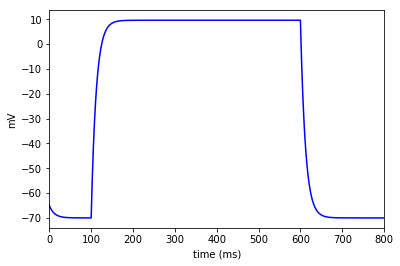

In [4]:
from neuron import h
h.load_file('stdrun.hoc')



#Create the soma section and define the default parameters
soma = h.Section(name='soma')
soma.nseg = 1
soma.diam = 200
soma.L = 100
soma.cm = 1.4884e-4/6.2832e-4

#Insert the Hodgkin-Huxley channels and define the conductances
soma.insert('hh')
soma.gnabar_hh = 0
soma.gkbar_hh = 0
soma.gl_hh = 2.0e-5
soma.el_hh = -70

#v_init = h.v_init= -60

#Inject current in the middle of the soma
stim = h.IClamp(0.5)
stim.delay = 100
stim.dur = 500
stim.amp = 1

tstop = h.tstop = 800   #ms

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
#Record Results  
h.dt = 0.025

v0_vec = h.Vector()
t_vec = h.Vector()

v0_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)
h.run()


#Visualize Results
from matplotlib import pyplot
pyplot.figure()
pyplot.plot(t_vec, v0_vec,'b')
pyplot.xlim(0, 800)
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')


pyplot.show()

